In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hrishitpatil/flight-data-2024")

print("Path to dataset files:", path)

100%|██████████| 270M/270M [00:02<00:00, 105MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hrishitpatil/flight-data-2024/versions/2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

print("Bibliotecas carregadas com sucesso!")

Bibliotecas carregadas com sucesso!


In [ ]:
csv_file = os.path.join(path, "flight_data_2024.csv")
df = pd.read_csv(csv_file)

/tmp/ipython-input-3701274810.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay            float64
 23  cancelled            int64  
 24

In [ ]:
#AMOSTRA COM 50 MIL LINHAS PARA FICAR MENOS LENTO

df_amostra = df.sample(n=50000, random_state=42)
print(f"Amostra criada com {len(df_amostra)} linhas")

Amostra criada com 50000 linhas


In [ ]:
# Pega só as colunas numéricas do dataframe
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total de colunas numéricas: {len(colunas_numericas)}")
print("\nColunas:")
for col in colunas_numericas:
    print(f"  - {col}")

Total de colunas numéricas: 26

Colunas:
  - year
  - month
  - day_of_month
  - day_of_week
  - op_carrier_fl_num
  - crs_dep_time
  - dep_time
  - dep_delay
  - taxi_out
  - wheels_off
  - wheels_on
  - taxi_in
  - crs_arr_time
  - arr_time
  - arr_delay
  - cancelled
  - diverted
  - crs_elapsed_time
  - actual_elapsed_time
  - air_time
  - distance
  - carrier_delay
  - weather_delay
  - nas_delay
  - security_delay
  - late_aircraft_delay


In [27]:
# Gera estatísticas descritivas
estatisticas = df[colunas_numericas].describe()
estatisticas

,year,month,day_of_month,day_of_week,op_carrier_fl_num,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,7079081.0,7.079081e+06,7.079081e+06,7.079081e+06,7.079080e+06,7.079081e+06,6.986422e+06,6.986111e+06,6.983347e+06,6.983347e+06,...,7.079081e+06,7.079080e+06,6.965267e+06,6.965267e+06,7.079081e+06,7.079081e+06,7.079081e+06,7.079081e+06,7.079081e+06,7.079081e+06
mean,2024.0,6.584868e+00,1.578445e+01,3.981945e+00,2.504623e+03,1.327300e+03,1.330765e+03,1.267708e+01,1.790445e+01,1.353542e+03,...,2.471931e-03,1.467665e+02,1.412151e+02,1.149997e+02,8.339062e+02,5.060440e+00,8.752369e-01,2.771828e+00,2.541686e-02,5.929302e+00
std,0.0,3.396806e+00,8.786433e+00,2.012279e+00,1.652253e+03,4.930306e+02,5.094779e+02,5.605997e+01,9.677410e+00,5.120475e+02,...,4.965703e-02,7.238692e+01,7.230781e+01,7.036955e+01,5.962536e+02,3.572703e+01,1.542974e+01,1.546485e+01,1.422602e+00,3.106135e+01
min,2024.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.600000e+01,1.000000e+00,1.000000e+00,...,0.000000e+00,-1.600000e+02,1.500000e+01,5.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024.0,4.000000e+00,8.000000e+00,2.000000e+00,1.151000e+03,9.050000e+02,9.080000e+02,-6.000000e+00,1.200000e+01,9.240000e+02,...,0.000000e+00,9.300000e+01,8.800000e+01,6.300000e+01,3.990000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2024.0,7.000000e+00,1.600000e+01,4.000000e+00,2.227000e+03,1.320000e+03,1.325000e+03,-2.000000e+00,1.500000e+01,1.338000e+03,...,0.000000e+00,1.300000e+02,1.250000e+02,9.800000e+01,6.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2024.0,1.000000e+01,2.300000e+01,6.000000e+00,3.717000e+03,1.736000e+03,1.746000e+03,9.000000e+00,2.100000e+01,1.801000e+03,...,0.000000e+00,1.770000e+02,1.720000e+02,1.450000e+02,1.069000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2024.0,1.200000e+01,3.100000e+01,7.000000e+00,8.819000e+03,2.400000e+03,2.400000e+03,3.777000e+03,2.140000e+02,2.400000e+03,...,1.000000e+00,1.326000e+03,7.920000e+02,7.230000e+02,5.095000e+03,3.689000e+03,1.804000e+03,2.700000e+03,1.164000e+03,2.690000e+03


In [29]:
# Calcula assimetria de cada coluna
assimetria = df[colunas_numericas].skew()

print("=" * 50)
print("ASSIMETRIA (SKEWNESS) DAS VARIÁVEIS")
print("=" * 50)
print("\n📖 Como interpretar:")
print("   • Valor ≈ 0: distribuição simétrica (normal)")
print("   • Valor > 0: cauda puxada para DIREITA (mais valores baixos)")
print("   • Valor < 0: cauda puxada para ESQUERDA (mais valores altos)")
print("   • |Valor| > 1: assimetria forte")
print("\n" + "-" * 50)

for col in assimetria.index:
    valor = assimetria[col]
    if abs(valor) < 0.5:
        interpretacao = "✅ Simétrica"
    elif abs(valor) < 1:
        interpretacao = "⚠️ Moderada"
    else:
        interpretacao = "🔴 Forte"

    direcao = "→ direita" if valor > 0 else "← esquerda" if valor < 0 else "centro"

    print(f"{col:25} | {valor:8.2f} | {interpretacao} ({direcao})")

ASSIMETRIA (SKEWNESS) DAS VARIÁVEIS

📖 Como interpretar:
   • Valor ≈ 0: distribuição simétrica (normal)
   • Valor > 0: cauda puxada para DIREITA (mais valores baixos)
   • Valor < 0: cauda puxada para ESQUERDA (mais valores altos)
   • |Valor| > 1: assimetria forte

--------------------------------------------------
year                      |     0.00 | ✅ Simétrica (centro)
month                     |    -0.03 | ✅ Simétrica (← esquerda)
day_of_month              |    -0.00 | ✅ Simétrica (← esquerda)
day_of_week               |     0.01 | ✅ Simétrica (→ direita)
op_carrier_fl_num         |     0.47 | ✅ Simétrica (→ direita)
crs_dep_time              |     0.08 | ✅ Simétrica (→ direita)
dep_time                  |     0.03 | ✅ Simétrica (→ direita)
dep_delay                 |    11.06 | 🔴 Forte (→ direita)
taxi_out                  |     3.49 | 🔴 Forte (→ direita)
wheels_off                |    -0.01 | ✅ Simétrica (← esquerda)
wheels_on                 |    -0.34 | ✅ Simétrica (← esqu

Gerando histogramas... (pode demorar um pouco)


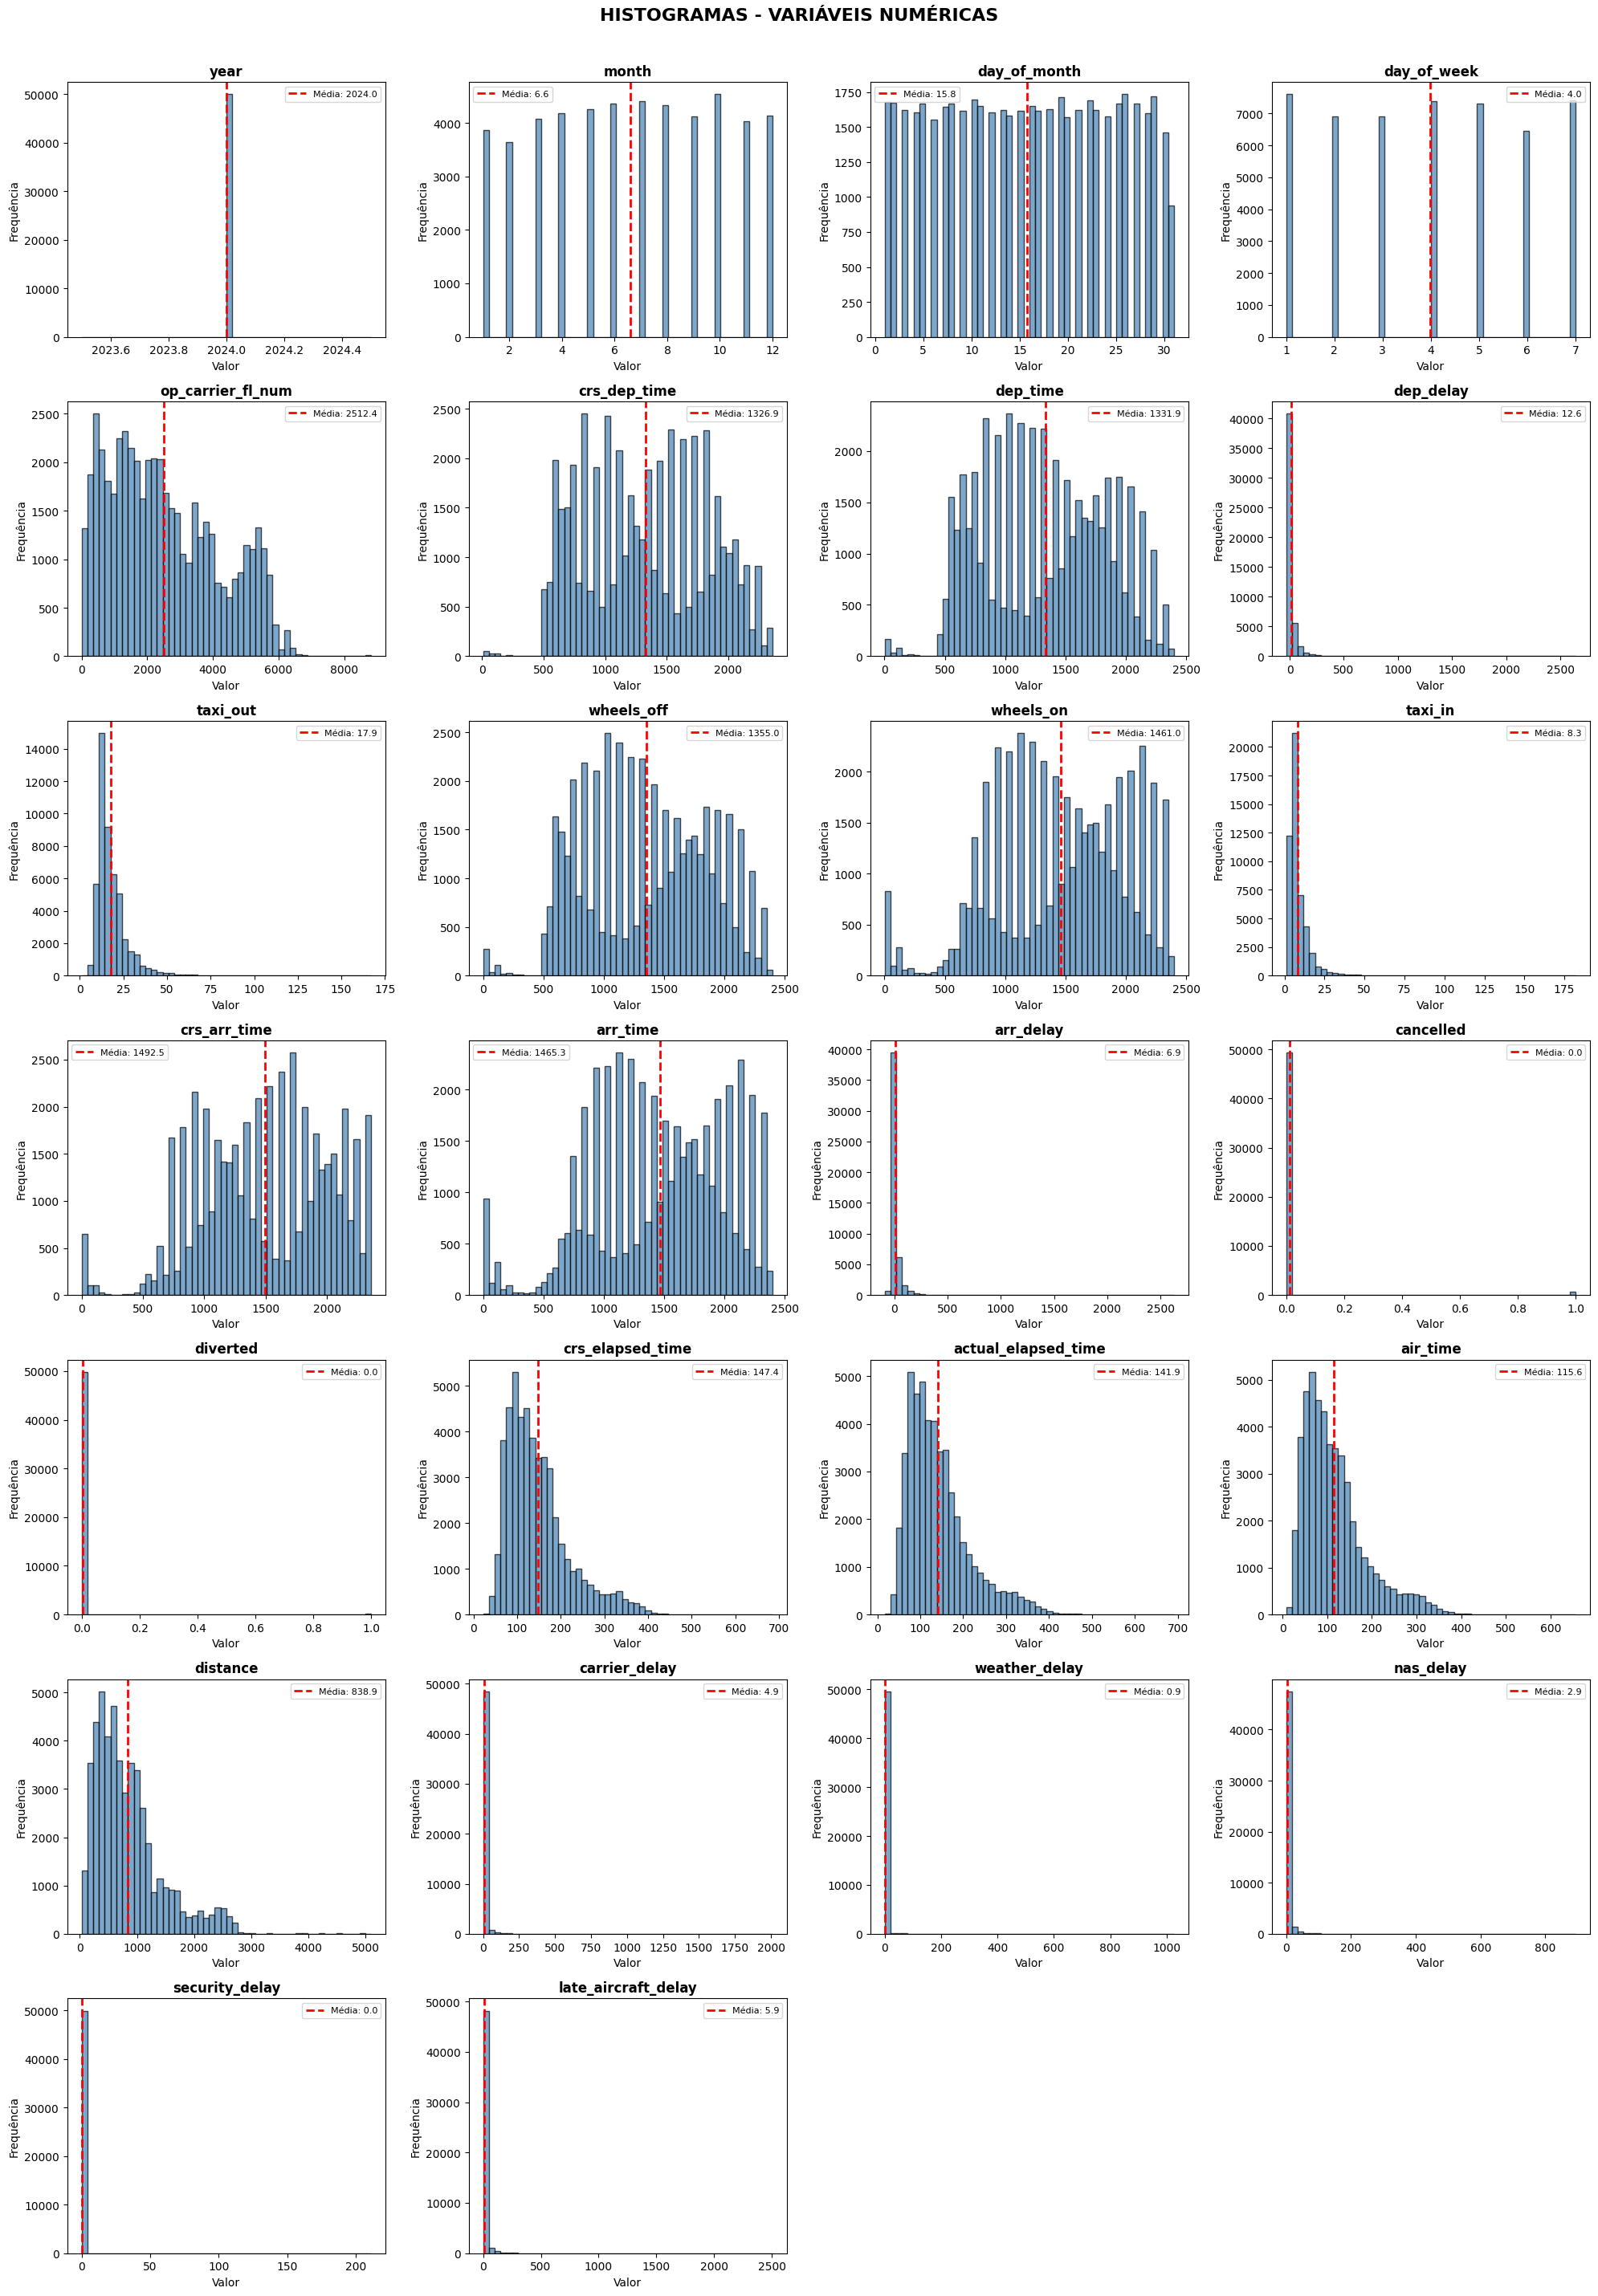


✅ Histogramas gerados!


In [32]:
# Configura o tamanho da figura
n_cols = 4  # 4 gráficos por linha
n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols  # Calcula linhas necessárias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Transforma em lista simples

print("Gerando histogramas... (pode demorar um pouco)")

for i, col in enumerate(colunas_numericas):
    ax = axes[i]

    # Usa a amostra para o gráfico (mais rápido)
    dados = df_amostra[col].dropna()

    # Cria histograma
    ax.hist(dados, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')

    # Adiciona linha da média
    media = dados.mean()
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.1f}')
    ax.legend(fontsize=8)

# Remove gráficos vazios (se sobrar espaço)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('HISTOGRAMAS - VARIÁVEIS NUMÉRICAS', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n✅ Histogramas gerados!")

# EIXO X valores encontrados
# EIXO Y frequencia com que os valores aparecem

Gerando boxplots... (pode demorar um pouco)


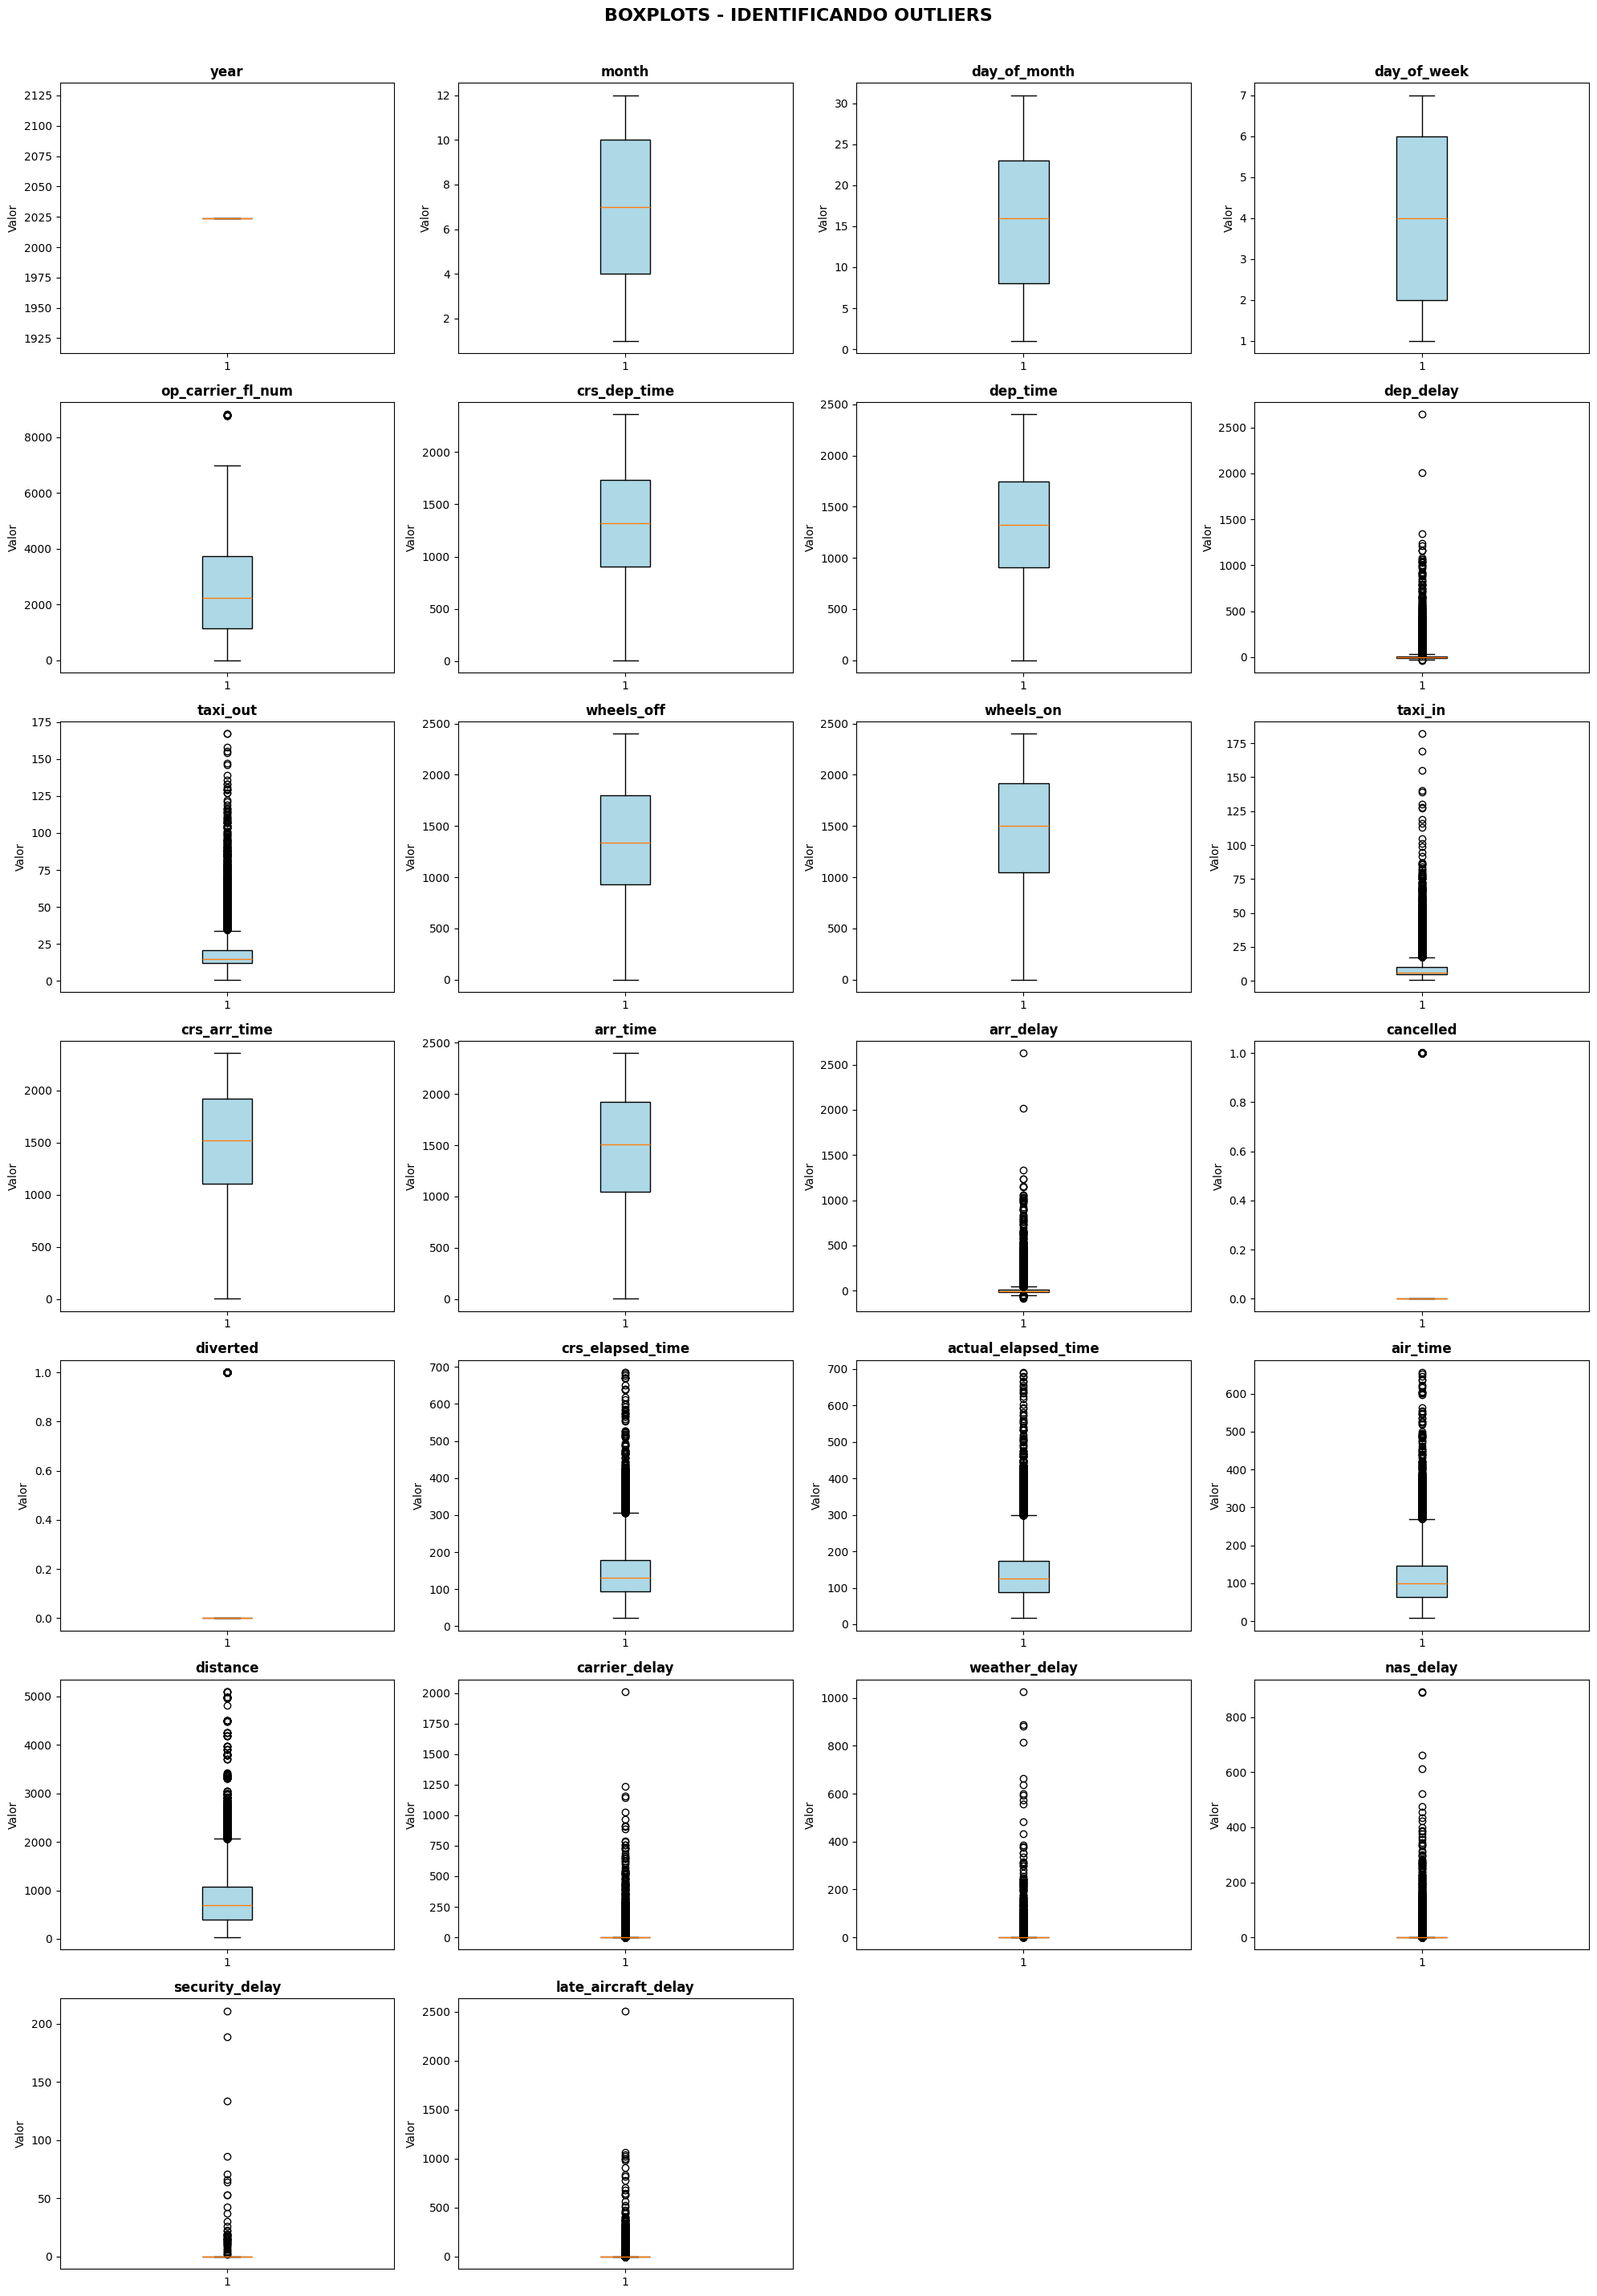


✅ Boxplots gerados!


In [31]:
#BOXPLOTS

# Configura o tamanho da figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

print("Gerando boxplots... (pode demorar um pouco)")

for i, col in enumerate(colunas_numericas):
    ax = axes[i]

    # Usa a amostra para o gráfico
    dados = df_amostra[col].dropna()

    # Cria boxplot
    bp = ax.boxplot(dados, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')

    ax.set_title(f'{col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor')

# Remove gráficos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('BOXPLOTS - IDENTIFICANDO OUTLIERS', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n✅ Boxplots gerados!")

# Como ler o gráfico:

# outliers →    •  •
#                       │
#        máximo   →    ─┬─
#                       │
#        75% (Q3) →   ┌─┴─┐
#                     │   │
#        mediana →    │───│   ← 50% dos dados estão dentro da caixa
#                     │   │
#        25% (Q1) →   └─┬─┘
#                       │
#        mínimo   →    ─┴─
#                       │
#        outliers →    •  •

In [33]:
# Tabela resumo com todas estatisticas
resumo = pd.DataFrame({
    'Média': df[colunas_numericas].mean(),
    'Mediana': df[colunas_numericas].median(),
    'Desvio Padrão': df[colunas_numericas].std(),
    'Assimetria': df[colunas_numericas].skew(),
    'Mínimo': df[colunas_numericas].min(),
    'Máximo': df[colunas_numericas].max(),
    'Valores Nulos': df[colunas_numericas].isnull().sum(),
    '% Nulos': (df[colunas_numericas].isnull().sum() / len(df) * 100).round(2)
})

print("=" * 70)
print("📊 RESUMO ESTATÍSTICO COMPLETO - VARIÁVEIS NUMÉRICAS")
print("=" * 70)
resumo.round(2)

📊 RESUMO ESTATÍSTICO COMPLETO - VARIÁVEIS NUMÉRICAS


,Média,Mediana,Desvio Padrão,Assimetria,Mínimo,Máximo,Valores Nulos,% Nulos
year,2024.00,2024.0,0.00,0.00,2024.0,2024.0,0,0.00
month,6.58,7.0,3.40,-0.03,1.0,12.0,0,0.00
day_of_month,15.78,16.0,8.79,-0.00,1.0,31.0,0,0.00
day_of_week,3.98,4.0,2.01,0.01,1.0,7.0,0,0.00
op_carrier_fl_num,2504.62,2227.0,1652.25,0.47,1.0,8819.0,1,0.00
crs_dep_time,1327.30,1320.0,493.03,0.08,1.0,2400.0,0,0.00
dep_time,1330.77,1325.0,509.48,0.03,1.0,2400.0,92659,1.31
dep_delay,12.68,-2.0,56.06,11.06,-96.0,3777.0,92970,1.31
taxi_out,17.90,15.0,9.68,3.49,1.0,214.0,95734,1.35
wheels_off,1353.54,1338.0,512.05,-0.01,1.0,2400.0,95734,1.35
